In [1]:
#practical statistics for data science and statistics

import pandas as pd
import numpy as np

In [2]:
state = pd.read_csv("state_crime.csv")
state

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,101.0,222.1,179.8,2.7,...,10.1,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


Example:Location estimates of population and murder rates

calculating mean,median and trimmed mean of the population

In [3]:
#mean of the population

print(state['Data.Population'].mean())

9708501.690208668


In [4]:
pip install scipy

In [5]:
from scipy.stats import trim_mean

In [6]:
print(trim_mean(state['Data.Population'],0.1))

4009627.192940233


In [7]:
print(state['Data.Population'].median())

3358000.0


In [8]:
print(state['Data.Rates.Violent.Murder'].mean())

6.477207062600316


In [9]:
#for weighted average of mean we can use numpy
print(np.average(state['Data.Rates.Violent.Murder'], weights=state['Data.Population']))



6.838440316176802


In [10]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [11]:
import wquantiles

In [12]:
#for weighted median we cannot use np but we have to use specialized package known as wquantiles
print(wquantiles.median(state['Data.Rates.Violent.Murder'],weights = state['Data.Population']))

6.0


# Estimates of variability

In [13]:
print(state.head())

     State  Year  Data.Population  Data.Rates.Property.All  \
0  Alabama  1960          3266740                   1035.4   
1  Alabama  1961          3302000                    985.5   
2  Alabama  1962          3358000                   1067.0   
3  Alabama  1963          3347000                   1150.9   
4  Alabama  1964          3407000                   1358.7   

   Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
0                         355.9                        592.1   
1                         339.3                        569.4   
2                         349.1                        634.5   
3                         376.9                        683.4   
4                         466.6                        784.1   

   Data.Rates.Property.Motor  Data.Rates.Violent.All  \
0                       87.3                   186.6   
1                       76.8                   168.5   
2                       83.4                   157.3   
3                 

Standard deviation

In [14]:
print(state['Data.Population'].std)

<bound method NDFrame._add_numeric_operations.<locals>.std of 0       3266740
1       3302000
2       3358000
3       3347000
4       3407000
         ...   
3110     586107
3111     585501
3112     579315
3113     577737
3114     578759
Name: Data.Population, Length: 3115, dtype: int64>


Calculating interquantile range that is defined as 75%-25%


In [15]:
print(state['Data.Population'].quantile(0.75) - state['Data.Population'].quantile(0.25))

4803680.5


# Percentiles and quantiles

In [16]:
print(state['Data.Rates.Violent.Murder'].quantile([0,0.0025,0.005,0.01,0.0125,0.015]))


0.0000    0.200
0.0025    0.500
0.0050    0.657
0.0100    0.900
0.0125    1.000
0.0150    1.000
Name: Data.Rates.Violent.Murder, dtype: float64


In [17]:
percentages = [0,0.25,0.50,0.75,0.95]
df = pd.DataFrame(state['Data.Rates.Violent.Murder'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

                            0%  25.0%  50.0%  75.0%  95.0%
Data.Rates.Violent.Murder  0.2    3.1    5.4    8.4   13.2


In [18]:
import matplotlib.pyplot as plt

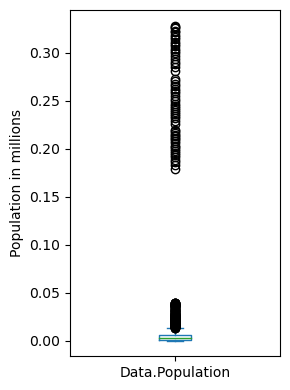

In [19]:
ax = (state['Data.Population']/1_00_00_00_000).plot.box(figsize=(3,4))
ax.set_ylabel('Population in millions')

plt.tight_layout()
plt.show()

# FREQUENCY TABLE AND HISTOGRAMS

The cut method is used to split the data into bins and also it splits into equal number of frequencies

In [20]:
binnedpopulation = pd.cut(state['Data.Population'],10)
print(binnedpopulation.value_counts())

(-101846.356, 33027502.6]     3034
(33027502.6, 65828838.2]        21
(197034180.6, 229835516.2]      15
(295438187.4, 328239523.0]      15
(229835516.2, 262636851.8]      13
(262636851.8, 295438187.4]      10
(164232845.0, 197034180.6]       7
(65828838.2, 98630173.8]         0
(98630173.8, 131431509.4]        0
(131431509.4, 164232845.0]       0
Name: Data.Population, dtype: int64


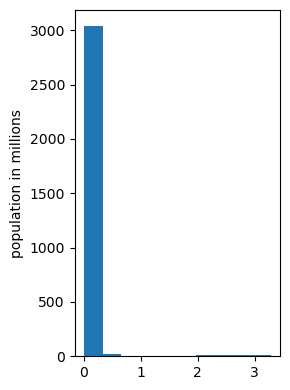

In [21]:
ax = (state['Data.Population']/10_00_00_000).plot.hist(figsize=(3,4))
ax.set_ylabel('population in millions')
plt.tight_layout()
plt.show()

# Density Estimates

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


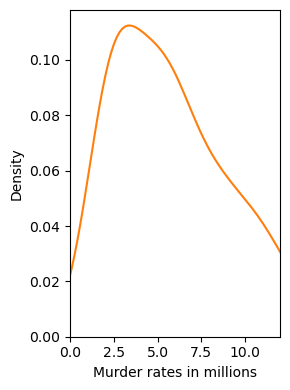

In [22]:
ax = (state['Data.Rates.Violent.Murder']/10_00_00_000).plot.hist(density=True,xlim = [0,12],bins =range(1,12),figsize=(3,4))
state['Data.Rates.Violent.Murder'].plot.density(ax=ax)
ax.set_xlabel('Murder rates in millions')
plt.tight_layout()
plt.show()

# Correlation

In [23]:
# Convert the index to datetime if it's not already
state.index = pd.to_datetime(state.index)

# Filter data for dates July 2012 through June 2015
murder_statistics = state['Data.Rates.Violent.Murder'].loc[state.index >= '2012-07-01']

# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = state.corr()

# Alternatively, you can calculate the correlation
print(correlation_matrix)

                                   Year  Data.Population  \
Year                           1.000000         0.050059   
Data.Population                0.050059         1.000000   
Data.Rates.Property.All       -0.002953         0.024358   
Data.Rates.Property.Burglary  -0.245038         0.029879   
Data.Rates.Property.Larceny    0.125618         0.006624   
Data.Rates.Property.Motor     -0.034138         0.068815   
Data.Rates.Violent.All         0.224697         0.072642   
Data.Rates.Violent.Assault     0.334608         0.063605   
Data.Rates.Violent.Murder     -0.095315         0.016995   
Data.Rates.Violent.Rape        0.547618         0.017843   
Data.Rates.Violent.Robbery     0.018864         0.072265   
Data.Totals.Property.All       0.030804         0.958821   
Data.Totals.Property.Burglary -0.004782         0.923687   
Data.Totals.Property.Larceny   0.046006         0.966589   
Data.Totals.Property.Motor     0.023184         0.936790   
Data.Totals.Violent.All        0.062184 

In [24]:
import seaborn as sns

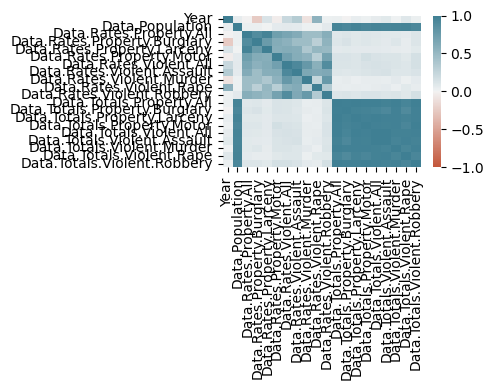

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()